I aim to answer the question about the relevancy of the incorporation of the time variable in my analysis. This was recommended to me by Dr. Wayne Winston in light that previous studies in the field had not included time on a continuoum.

To test its relevancy, I fit a logistic regression model with a binary variable 'win' as the target variable. The regressor variables for the model were 'time_rem' (time remaining to end of regulation), 'foul' (was a foul commited in the given time frame, given there was an opportunity to foul), as well as for the interaction variable 'time_rem'X'foul'.

Statistical significance on the coefficient corresponding to 'time_rem' or 'time_rem'X'foul' would highlight importance of time and the relevancy of the inclusion of time as a variable in my analysis.

Mounted at /content/drive


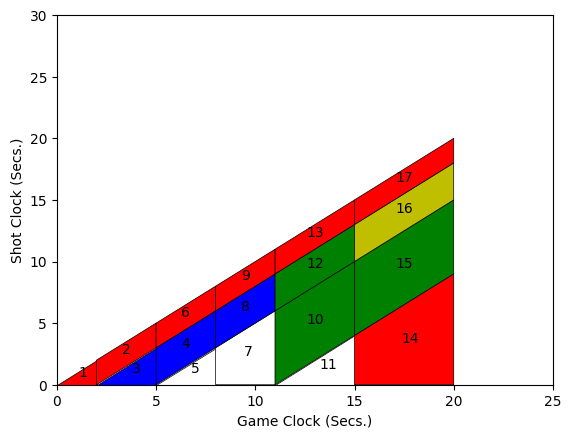

In [ ]:
import pandas as pd
from google.colab import drive
import numpy as np
import dask.dataframe as dd
from sympy import Plane, Point2D, Line2D,Polygon, Segment,Triangle
drive.mount('/content/drive')

maxx = 25
res_2010 = pd.read_csv('/content/drive/My Drive/Up3Results/newup3normal_pbp_2010_results.csv')
res_2012 = pd.read_csv('/content/drive/My Drive/Up3Results/newup3normal_pbp_2012_results.csv')
res_2014 = pd.read_csv('/content/drive/My Drive/Up3Results/newup3normal_pbp_2014_results.csv')
res_2016 = pd.read_csv('/content/drive/My Drive/Up3Results/newup3normal_pbp_2016_results.csv')
res_2017 = pd.read_csv('/content/drive/My Drive/Up3Results/newup3normal_pbp_2017_results.csv')
res_2018 = pd.read_csv('/content/drive/My Drive/Up3Results/newup3normal_pbp_2018_results.csv')
res_2020 = pd.read_csv('/content/drive/My Drive/Up3Results/newup3normal_pbp_2020_results.csv')

results = pd.concat([res_2010,res_2012,res_2014,res_2016,res_2017,res_2018,res_2020],ignore_index=True)
grouped = results.groupby(['Strategy']).sum()
grouped['Win% Foul'] = (100*grouped['Games Won Foul']) / grouped['Games Played Foul']
grouped['Win% NoFoul'] =(100*grouped['Games Won NoFoul']) / grouped['Games Played NoFoul']
grouped.reset_index(inplace=True)
grouped['MinGC'] = [eval(x).bounds[0] for x in grouped['Strategy']]
grouped['MinSC'] = [eval(x).bounds[1] for x in grouped['Strategy']]
grouped['Centroid (GC,SC)'] = [(eval(x).centroid) for x in grouped['Strategy']]
grouped.sort_values(['MinGC','MinSC'], ascending=True, inplace=True, ignore_index=True)
grouped['Polygon No.'] = grouped.index+1


import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import matplotlib.pyplot as plt
next_wp_nofoul = 10000
fig, ax = plt.subplots(1,1)
for idx, row in grouped.iterrows():
    plt.annotate(text=row['Polygon No.'], xy=row['Centroid (GC,SC)'],
                 horizontalalignment='center',size=10)

gp_count=0
gw_count=0

for i in range(len(grouped.reset_index()['Strategy'])):
  poli = eval(grouped.reset_index()['Strategy'][i].replace('Polygon(','Polygon([').replace('Triangle(','Polygon([').replace('))',')])').replace('Point2D(','('))
  ax.set_facecolor('w')


  wp_foul = grouped['Win% Foul'].values[i]
  wp_nofoul = grouped['Win% NoFoul'].values[i]
  gp_foul = grouped['Games Played Foul'].values[i]
  gp_nofoul = grouped['Games Played NoFoul'].values[i]
  gw_foul = grouped['Games Won Foul'].values[i]
  gw_nofoul = grouped['Games Won NoFoul'].values[i]
  gp_count += ((gp_foul+gp_nofoul)/2)
  gw_count += ((gw_foul+gw_nofoul)/2)
  if gp_foul ==0:
    Polygon.set_color(poli,c='w')
    Polygon.set_edgecolor(poli,color='k')
    Polygon.set_linewidth(poli,w=.5)
    Polygon.set_label(poli,s=str(i))
    ax.add_patch(poli)
  elif wp_foul>wp_nofoul:
    Polygon.set_color(poli,c='g')
    Polygon.set_edgecolor(poli,color='k')

    Polygon.set_linewidth(poli,w=.5)
    ax.add_patch(poli)
    Polygon.set_label(poli,s=str(i))
  elif wp_nofoul>wp_foul:
    if i ==2:
      next_wp_nofoul = grouped['Win% NoFoul'].values[0]
    elif i ==4:
      next_wp_nofoul = grouped['Win% NoFoul'].values[3]
    elif i ==5:
      next_wp_nofoul = grouped['Win% NoFoul'].values[2]
    elif i ==6:
      next_wp_nofoul = grouped['Win% NoFoul'].values[2]
    elif i ==11:
      next_wp_nofoul = grouped['Win% NoFoul'].values[6]
    elif i ==10:
      next_wp_nofoul = grouped['Win% NoFoul'].values[5]
    elif i ==9:
      next_wp_nofoul = grouped['Win% NoFoul'].values[4]
    elif i ==15:
      next_wp_nofoul = grouped['Win% NoFoul'].values[9]
    else:
      next_wp_nofoul = 1000
    if next_wp_nofoul >= wp_foul:
      Polygon.set_color(poli,c='r')
      Polygon.set_edgecolor(poli,color='k')

      Polygon.set_linewidth(poli,w=.5)
      ax.add_patch(poli)
      Polygon.set_label(poli,s=str(i))
    else:
      Polygon.set_color(poli,c='y')
      Polygon.set_edgecolor(poli,color='k')

      Polygon.set_linewidth(poli,w=.5)
      ax.add_patch(poli)
      Polygon.set_label(poli,s=str(i))
  else:
    Polygon.set_color(poli,c='b')
    Polygon.set_edgecolor(poli,color='k')

    Polygon.set_linewidth(poli,w=.5)
    ax.add_patch(poli)
    Polygon.set_label(poli,s=str(i))





plt.ylim(0,30)
plt.xlim(0,maxx)
ax.set_xlabel('Game Clock (Secs.)')
ax.set_ylabel('Shot Clock (Secs.)')

plt.show()
#doesnt make sense


Polygons 1, 2, 6, 9, 13, and 17 lie on the diagonal such that all fouling opportunities ocurring in these polygons occurred with the shot-clock turned off or with 0-2 seconds difference between the shot-clock and game-clock.
For example, if a foul where not committed in Polygon 17, that same play has the opportunity of being counted towards every polygon mentioned above. We will study these polygons as they allow us to view the importance of time in one variable (as opposed to 2: shot clock and game clock). If the game clock time were used as a continuous time variable, there would not be a positive way to chose one specific time. Namely, if a team decides to foul with 4 seconds remaining in the game it effective chose not to foul with 4.01, 4.001, or 4.0001 seconds remaining. Thus, there could be an infinite number of observations concerning a single fouling decision. Instead, using the polygons allows for a one-dimentional measure of time with a well defined number of observations.

In [ ]:
grouped

,Strategy,Games Won Foul,Games Played Foul,Games Won NoFoul,Games Played NoFoul,Win% Foul,Win% NoFoul,MinGC,MinSC,"Centroid (GC,SC)",Polygon No.
0,"Triangle(Point2D(0, 0), Point2D(2, 0), Point2D...",160,174,2321,2413,91.954023,96.187319,0,0,"(4/3, 2/3)",1
1,"Polygon(Point2D(5, 3), Point2D(5, 5), Point2D(...",336,367,2755,2929,91.553134,94.059406,2,0,"(7/2, 5/2)",2
2,"Triangle(Point2D(2, 0), Point2D(5, 0), Point2D...",2,2,7,7,100.000000,100.000000,2,0,"(4, 1)",3
3,"Polygon(Point2D(8, 3), Point2D(8, 6), Point2D(...",1,1,11,11,100.000000,100.000000,5,0,"(13/2, 3)",4
4,"Triangle(Point2D(5, 0), Point2D(8, 0), Point2D...",0,0,8,8,NaN,100.000000,5,0,"(7, 1)",5
5,"Polygon(Point2D(8, 6), Point2D(8, 8), Point2D(...",208,228,2638,2856,91.228070,92.366947,5,3,"(13/2, 11/2)",6
6,"Polygon(Point2D(8, 0), Point2D(11, 0), Point2D...",0,0,10,12,NaN,83.333333,8,0,"(29/3, 7/3)",7
7,"Polygon(Point2D(11, 6), Point2D(11, 9), Point2...",1,1,17,17,100.000000,100.000000,8,3,"(19/2, 6)",8
8,"Polygon(Point2D(11, 9), Point2D(11, 11), Point...",138,152,2533,2776,90.789474,91.246398,8,6,"(19/2, 17/2)",9
9,"Polygon(Point2D(15, 4), Point2D(15, 10), Point...",1,1,35,40,100.000000,87.500000,11,0,"(13, 5)",10


In [ ]:
import pandas as pd

polygon_list = ['0-2'] * (174+2413) + ['2-5'] * (367+2929) + ['5-8'] * (228+2856) + ['8-11'] * (152+2776) + ['11-15'] * (126+2644) + ['15-20'] * (87+2095)
foul_list = [1]*174 +[0]*2413 + [1]*367 + [0]*2929 + [1]*228 + [0]*2856 + [1]*152 + [0]*2776 + [1]*126 + [0]*2644 + [1]*87 + [0]*2095
win_list = [1]*160 + [0]*14 + [1]*2321 + [0]*92 + [1]*336 + [0]*31 + [1]*2755 + [0]*174 + [1]*208 + [0]*20 + [1]*2638 + [0]*218 + [1]*138 + [0]*14 + [1]*2533 + [0]*243 + [1]*106 + [0]*20 + [1]*2399 + [0]*245 + [1]*76 + [0]*11 + [1]*1897 + [0]*198
data = pd.DataFrame({'time_rem':polygon_list, 'foul':foul_list, 'win':win_list})
#print(len(polygon_list),len(foul_list),len(win_list))
data['time_rem'] = data['time_rem'].astype("category")

In [ ]:
data

,time_rem,foul,win
0,0-2,1,1
1,0-2,1,1
2,0-2,1,1
3,0-2,1,1
4,0-2,1,1
...,...,...,...
16842,15-20,0,0
16843,15-20,0,0
16844,15-20,0,0
16845,15-20,0,0


In [ ]:
data.describe()


,foul,win
count,16847.000000,16847.000000
mean,0.067312,0.924022
std,0.250568,0.264971
min,0.000000,0.000000
25%,0.000000,1.000000
50%,0.000000,1.000000
75%,0.000000,1.000000
max,1.000000,1.000000


In [ ]:
import statsmodels.api as sm
model = sm.GLM.from_formula("win ~ time_rem + foul", family=sm.families.Binomial(), data=data)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    win   No. Observations:                16847
Model:                            GLM   Df Residuals:                    16840
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -4476.5
Date:                Sat, 08 Jul 2023   Deviance:                       8953.1
Time:                        21:46:55   Pearson chi2:                 1.68e+04
No. Iterations:                     6   Pseudo R-squ. (CS):           0.006216
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             3.1815      0.100     31.920      0.000       2.986       3.377
time_rem[T.11-15]    -0.9162      0.118     -7.736      0.000      -1.148      -0.684
time_rem[T.15-20]    -0.9199      0.123     -7.473      0.000      -1.161      -0.679
time_rem[T.2-5]      -0.4218      0.123     -3.434      0.001      -0.662      -0.181
time_rem[T.5-8]      -0.6692      0.120     -5.577      0.000      -0.904      -0.434
time_rem[T.8-11]     -0.8187      0.119     -6.891      0.000      -1.052      -0.586
foul                 -0.3626      0.106     -3.425      0.001      -0.570      -0.155
=====================================================================================
"""

AS YOU CAN SEE, THE LOGISTIC REGRESSION FUNCTION CREATED DUMMY VARIABLES FOR EVERY DIFFERENT POLYGON IN OUT TIME_REM VARIABLE. THE COEFFICIENT ASSOCIATED TO EACH OF THESE IS HIGHLY STATISTICALLY SIGNIFICANT. THUS, WE CONCLUDE THAT THE TIME_REM VARIABLE IS HIGHLY EXPLICATIVE* OF OUR TARGET VARIABLE WIN. IN OTHER WORDS, **** Fouling